# 顏色預處理

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##  color space 範圍
在我們選定要操作的範圍後有些事情需要特別注意

* OpenCV 會以 0~255 的值表示
* 有些值是以百分比或是包含負值的方式表示
* OpenCV 顯示圖片會以 uint8 (可儲存範圍 0~255) 方式表示
* 如果計算過程包含小數或是負值要自己轉換


##  HSV飽和度操作
1. 降兩成飽和度
2. uint8 格式
3. 灰階輸出

In [58]:
import cv2
img = cv2.imread(r"./IMAGE/lena.png", -1)
# 轉換 color space (BGR -> HSV)
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow("img_hsv",img_hsv)
# 操作飽和度時候需要轉成百分比（小數點）
img_hsv=img_hsv.astype('float32')

# 轉成小數點並調降兩成飽和度
# 除以 255 之後範圍就變成
img_hsv[...,1]=img_hsv[...,1]/255-0.2

# 後面在做一些邊緣條件判斷，確保所有的值都在合理範圍 (0~1)
# 在把圖片依序轉回 0~255 區間 > uint8 格式 > BGR 格式 就可以顯示圖片了
img_hsv=img_hsv.astype('uint8')
img_hsv=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)

cv2.imshow("img",img)
cv2.imshow("hsv",img_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 512, 3)


## 直方圖均衡 (Histogram Equalization)
---
實際攝影時，常因環境因素造成過曝或曝光不足，造成細節損失，這樣的照片輸入 AI 模型，往往會造成準確率低下，而 Histogram equalization 透過平衡直方圖 (Histogram)，可以恢復圖片該有的細節!

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214072)

## 直方圖 (Histogram)
---
![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214076)

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214078)

## 直方圖均衡 – 演算法
---
![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214079)

Max( f ) = 5

5 ＜ 23 ＝ 8，故最少可以用 3bit 來記錄這張圖得所有像素

所以像素的值域 ∈ [0,7]

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214082)

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214091)

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214092)

# 像素值分佈直方圖
cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)

影像：影像的來源，其型別可以是 uint8 或 float32，變數必須放在中括號當中，例如：[img]。

通道：指定影像的通道（channel），同樣必須放在中括號當中。若為灰階影像，則通道就要指定為 [0]，若為彩色影像則可用 [0]、[1] 或 [2] 指定 藍色、綠色或紅色的通道。

遮罩：以遮罩指定要納入計算的圖形區域，若指定為 None 則會計算整張圖形的所有像素。

區間數量：指定直方圖分隔區間的數量（bins），也就是圖形畫出來要有幾條長方形。

數值範圍：指定要計算的像素值範圍，通常都是設為 [0,256]（計算所有的像素值）。

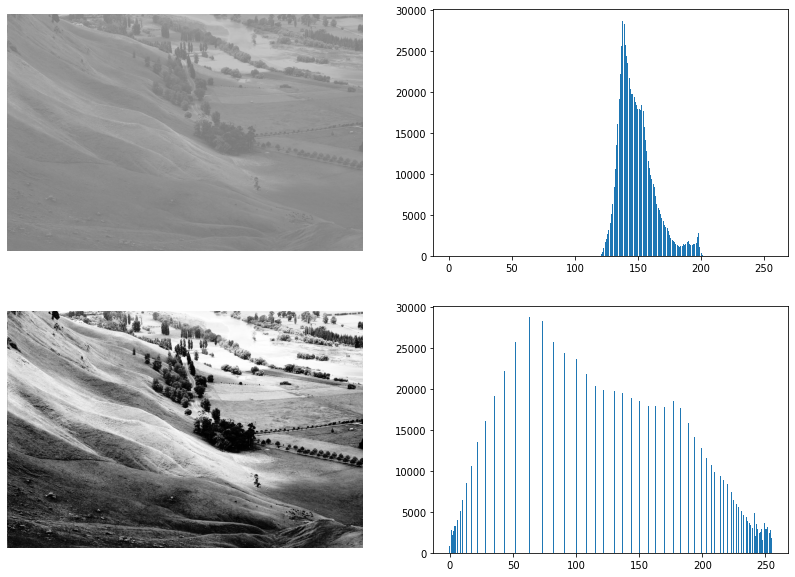

In [77]:
origin_img =  cv2.imread("./IMAGE/Unequalized_Hawkes_Bay_NZ.jpg")

gray_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
gray_img_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

# # cv2.equalizeHist(img)(只能操作灰階)
equalize_img = cv2.equalizeHist(gray_img)
equalize_img_hist = cv2.calcHist([equalize_img], [0], None, [256], [0, 256])

change_img = cv2.cvtColor(equalize_img, cv2.COLOR_GRAY2BGR)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.imshow(origin_img)
plt.axis("off")
plt.subplot(223)
plt.imshow(change_img)
plt.axis("off")

plt.subplot(222)
plt.bar(np.arange(1,257), gray_img_hist.squeeze())
plt.subplot(224)
plt.bar(range(0,256), equalize_img_hist.squeeze())

plt.show()

## 直方圖均衡 – 彩色圖片
處理 RGB 圖通常會轉到 HSV 對明亮度做直方圖均衡

不過我們也可以個別對 RGB 的 3 個 channel 做直方圖均衡

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214090)

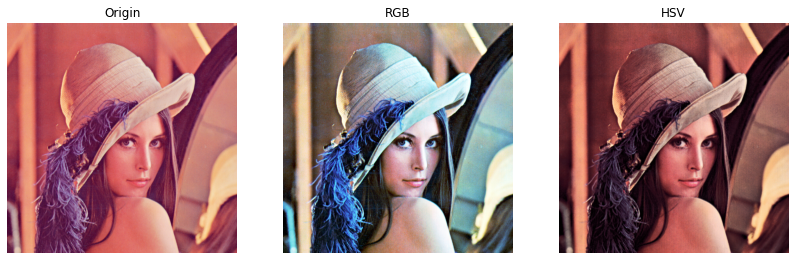

In [81]:
import cv2

# Origin img load with three channel
img = cv2.imread(r"./IMAGE/lena.png", -1)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
hisgram_b = cv2.equalizeHist(b)
hisgram_g = cv2.equalizeHist(g)
hisgram_r = cv2.equalizeHist(r)
hisgram_img = cv2.merge([hisgram_r,hisgram_g,hisgram_b])

HLS_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HLS_img[...,2] = cv2.equalizeHist(HLS_img[...,2])
HLS_img = cv2.cvtColor(HLS_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(14,10))

plt.subplot(131)
plt.imshow(rgb_img)
plt.axis("off")
plt.title("Origin")
plt.subplot(132)
plt.imshow(hisgram_img)
plt.axis("off")
plt.title("RGB")
plt.subplot(133)
plt.imshow(HLS_img)
plt.axis("off")
plt.title("HSV")


plt.show()

## 對比度
![](https://i.iter01.com/images/ae722ac5befe7717bd62440ce5941988ea2722a2c28e24500a09299a03a5c7f5.jpg)

## CLAHE
HE演算法在一種情況下，效果不好，如果一個圖片中有大塊的暗區或者亮區的話，效果非常不好。這個的原因，也非常好理解，因為HE其實要求一個圖片中必須有10%的最亮的畫素點，必須有10%第二亮的畫素點，必須有10%第三亮的畫素點……假設有一張純黑的圖片，你想想經過HE處理之後，會出現什麼情況？答案就是一部分黑的畫素也會被強行搞成白的

![](https://i.iter01.com/images/1005590bbf360d182a1fe58d3468db0c3005e59f828d41cb2f78a9d69e099ef6.jpg)

針對第一個問題，提出了CLHE，加入對比度限制，其實原理很簡單置直方圖分佈的閾值，將超過該閾值的分佈“均勻”分散至概率密度分佈上，由此來限制轉換函式（累計直方圖）的增幅。
![](https://i.iter01.com/images/f66f9cce58d9d6061e6b82aaa960df6e8a1ad953b8b64480887f922a8ef87009.jpg)
這樣的話，直方圖就不會出現概率密度函式過大的區域，從而避免了某些集中區域被拉得過於係數。

## Adaptive HE
Adaptive HE的基本思想是將原始圖片劃分成子區域，然後對每個子區域進行HE變換。當然，這樣做的問題應該是顯而易見的：
![](https://i.iter01.com/images/9623c15efb7ce395b244b97f071bc5cc88da41c700e09c4f208a10bf51a4c7aa.jpg)

## 雙線性插值的AHE
* 將影像分為多個矩形塊大小，對於每個矩形塊子圖，分別計算其灰度直方圖和對應的變換函式（累積直方圖）

* 將原始影像中的畫素按照分佈分為三種情況處理：

    * 紅色區域中的畫素按照其所在子圖的變換函式進行灰度對映
    * 綠色區域中的畫素按照所在的兩個相鄰子圖變換函式變換後進行線性插值得到
    * 紫色區域中的畫素按照其所在的四個相鄰子圖變換函式變換後雙線性插值得到
    
![](https://i.iter01.com/images/3b0187eee66ef3c46f4835ebd638c319d259f6dd65c4caf56d580b2ba5658382.jpg)

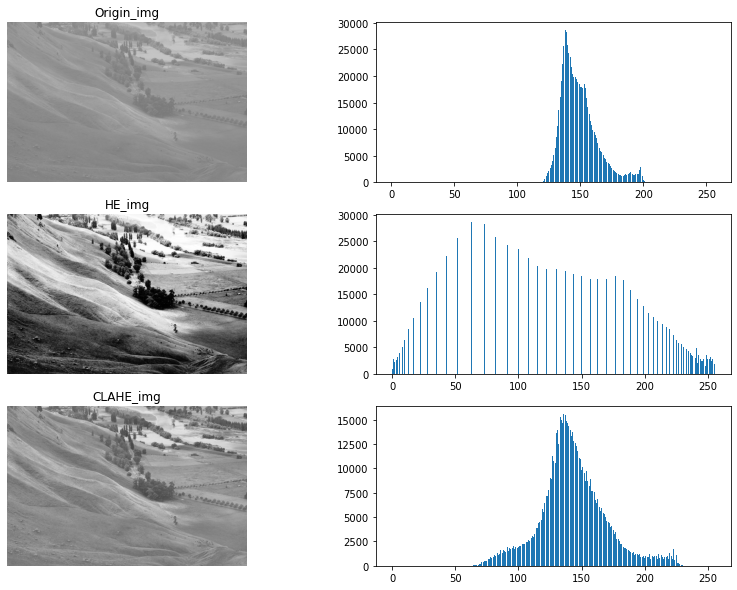

In [6]:
origin_img =  cv2.imread("./IMAGE/Unequalized_Hawkes_Bay_NZ.jpg")
gray_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
gray_img_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
# hav = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
equalize_img = cv2.equalizeHist(gray_img)

# # cv2.equalizeHist(img)(只能操作灰階)
equalize_img_hist = cv2.calcHist([equalize_img], [0], None, [256], [0, 256])
change_img = cv2.cvtColor(equalize_img, cv2.COLOR_GRAY2BGR)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray_img)

# res = np.hstack((gray_img, cl1))
cl1_hist = cv2.calcHist([cl1], [0], None, [256], [0, 256])
cl1 = cv2.cvtColor(cl1, cv2.COLOR_GRAY2BGR)

plt.figure(figsize=(14,10))

plt.subplot(321)
plt.imshow(origin_img)
plt.axis("off")
plt.title("Origin_img")
plt.subplot(323)
plt.imshow(change_img)
plt.axis("off")
plt.title("HE_img")
plt.subplot(325)
plt.imshow(cl1)
plt.axis("off")
plt.title("CLAHE_img")
plt.subplot(322)
plt.bar(np.arange(1,257), gray_img_hist.squeeze())
plt.subplot(324)
plt.bar(range(0,256), equalize_img_hist.squeeze())
plt.subplot(326)
plt.bar(range(0,256), cl1_hist.squeeze())
plt.show()

## 調整對比度 / 明亮度

![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214095)

f(x,y) 代表圖片原本的 pixel 值

g(x,y) 代表調整過後的 pixel 值

alpha 調整對比度 (alpha > 0)

beta 調整明亮度

In [3]:
import cv2
import matplotlib.pyplot as plt
# Origin img load with three channel
img = cv2.imread(r"./IMAGE/lena.png", -1)
# img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

cv2.namedWindow('light&dark')
cv2.resizeWindow('light&dark', 640, 480);
def nothing(x):
    pass

cv2.createTrackbar("alpha","light&dark",100,300,nothing)
cv2.createTrackbar("beta","light&dark",0,100,nothing)

while(1):
    alpha = cv2.getTrackbarPos("alpha","light&dark")
    beta = cv2.getTrackbarPos("beta","light&dark")
    img_change = cv2.convertScaleAbs(img, alpha=alpha/100, beta=beta)
    

    cv2.imshow("img",img)
    cv2.imshow("img_change",img_change)
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()

## Binarization (二值化)

ret, dst = cv2.threshold(src, thresh, maxval, type)

src：目標圖片

thresh：閾值大小

maxval：二值化的最大值大小

type：二值化之後的效果，包括五種類型：

    * cv2.THRESH_BINARY
    * cv2.THRESH_BINARY_INV
    * cv2.THRESH_TRUNC
    * cv2.THRESH_TOZERO
    * cv2.THRESH_TOZERO_INV
![](http://cumatrixfile.cupoy.com/00000178D91DF3BA0000000F6375706F795F72656C656173654349/marathon/1617952214101)

## Otsu's Threshold 二值化，自動計算最佳閥值'

針對雙峰類型直方圖找出最佳閥值
![](https://ithelp.ithome.com.tw/upload/images/20201002/201204249fg93JNiXe.png)

閥值為 87.0


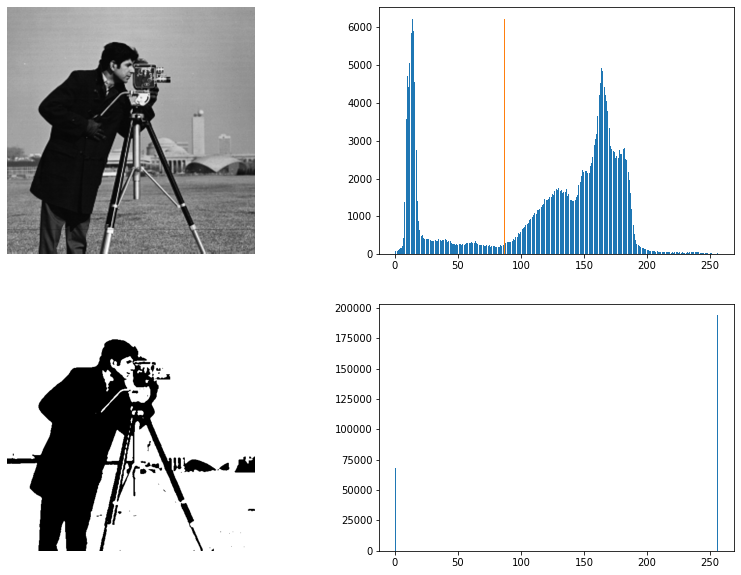

In [16]:
# Otsu's thresholding after Gaussian filtering
img = cv2.imread("./IMAGE/camera.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray_img,(5,5),0)
ret, th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("閥值為",ret)
gray_img_hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
th_hist = cv2.calcHist([th], [0], None, [256], [0, 256])

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.subplot(223)
plt.imshow(th,cmap="gray")
plt.axis("off")


plt.subplot(222)
plt.bar(np.arange(1,257), gray_img_hist.squeeze())
plt.bar(ret, max(gray_img_hist.squeeze()))
plt.subplot(224)
plt.bar(np.arange(1,257), th_hist.squeeze())
plt.show()

## 傅立葉變換
傅立葉變換的目的並不是為了觀察影像的頻率分佈（至少不是最終目的），更多情況下是為了對頻率進行過濾，通過修改頻率以達到影像增強，影像去噪，邊緣檢測，特徵提取，壓縮加密等目的。

高頻：變換劇烈的灰度分量，例如邊界

低頻：變換緩慢的灰度分量，例如一片大海

　　濾波器：

    * 低通濾波器：只保留低頻，會使得影像模糊
    * 高頻濾波器：只保留高頻，會使得影像細節增強

![](https://i.iter01.com/images/7f2fe8039417a266c7e7bbaccdc76ca1e1ee3e092efced49d83886750944d91f.png)

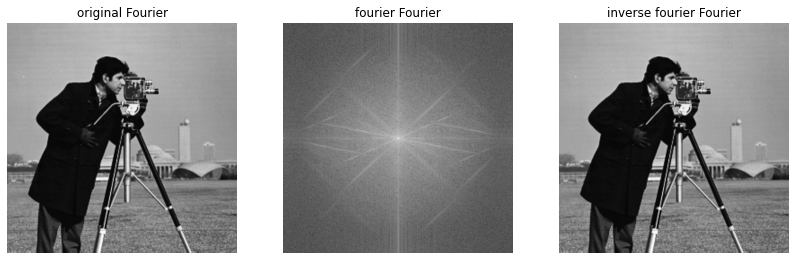

In [20]:
img = cv2.imread("./IMAGE/camera.jpg")
# 影像進行灰度化處理
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 傅立葉變換
# 快速傅立葉變換演算法得到頻率分佈
f = np.fft.fft2(img)
# 預設結果中心點位置是在左上角 呼叫fftshift()函式轉移到中間位置
fshift = np.fft.fftshift(f)
# fft 結果是複數，其絕對值結果是振幅
rimg = np.log(np.abs(fshift))

# 傅立葉逆變換
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)


# 展示結果
plt.figure(figsize=(14,10))
plt.subplot(131), plt.imshow(img, 'gray'), plt.title('original Fourier')
plt.axis('off')
plt.subplot(132), plt.imshow(rimg, 'gray'), plt.title('fourier Fourier')
plt.axis('off')
plt.subplot(133), plt.imshow(iimg, 'gray'), plt.title('inverse fourier Fourier')
plt.axis('off')
plt.show()

## 高通濾波

高通濾波器覆蓋掉中心低頻部分，將255的點變換為0，同時保留高頻部分
![](https://i.iter01.com/images/64f54b391fce51eab53c015b90fa8cc81271118905c8fd9896bb8c8d5724f4b9.png)

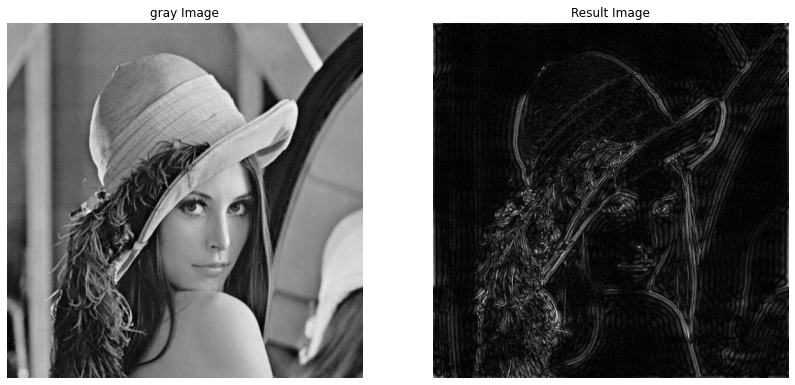

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取影像
img = cv2.imread('./IMAGE/lena.png', 0)

# 傅立葉變換
fimg = np.fft.fft2(img)
fshift = np.fft.fftshift(fimg)

# 設定高通濾波器 -> 去除大部分低頻，保留高頻區域 -> 達到邊緣檢測目的
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# 傅立葉逆變換
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

# 顯示原始影像和高通濾波處理影像
plt.figure(figsize=(14,10))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('gray Image')
plt.axis('off')
plt.subplot(122), plt.imshow(iimg, 'gray'), plt.title('Result Image')
plt.axis('off')
plt.show()

## 低通濾波
濾波影像是通過低通濾波器和頻譜影像形成。其中低通濾波器中心區域為白色255，其他區域為黑色0
![](https://i.iter01.com/images/7c93ca37c84aab3c60bb2114d0120818348b4d13ce4d6460106109d471ceec86.png)

(512, 512, 2) (512, 512, 2) (512, 512, 2)


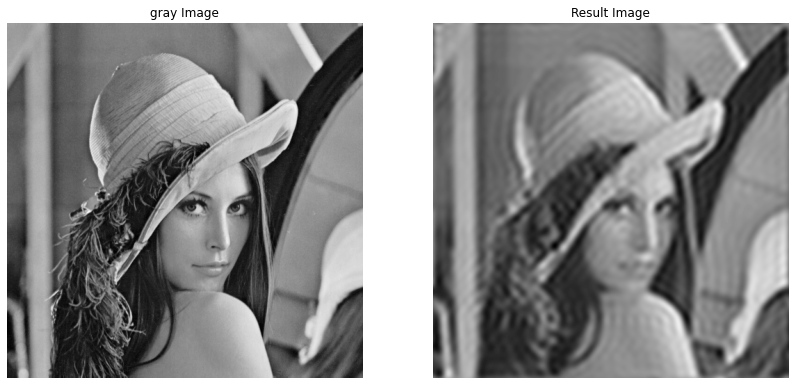

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取影像
img = cv2.imread('./IMAGE/lena.png', 0)

# 傅立葉變換
# fimg = np.fft.fft2(img)
fimg = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(fimg)

# 設定低通濾波器
rows, cols = img.shape
# 中心位置
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# 掩膜影像和頻譜影像乘積
f = fshift * mask
print(f.shape, fshift.shape, mask.shape)
# (199, 198, 2) (199, 198, 2) (199, 198, 2)


# 傅立葉逆變換
ishift = np.fft.ifftshift(f)
iimg = cv2.idft(ishift)
iimg = cv2.magnitude(iimg[:, :, 0], iimg[:, :, 1])

# 顯示原始影像和高通濾波處理影像
plt.figure(figsize=(14,10))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('gray Image')
plt.axis('off')
plt.subplot(122), plt.imshow(iimg, 'gray'), plt.title('Result Image')
plt.axis('off')
plt.show()